In [10]:
import numpy as np
import pandas as pd
import nltk as nlt
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
file_path = "../../data/processed/facebook_grouped_preprocessed/posts_by_month.json"

with open(file_path, "r", encoding="utf-8") as file:
    json_data = json.load(file)

# Flatten into a single list of all posts
all_posts = []
for month, posts in json_data.items():
    all_posts.extend(posts)  # Combine all posts into one list

# Create DataFrame
df = pd.DataFrame(all_posts)


In [12]:
df.head()

,month,title,date,time,score,num_comments,flair,body,combined_text
0,2025-03,is it true hardly anyone uses facebook anymore...,2025-03-05,07:30:01,200,217,Discussion,,is it true hardly anyone uses facebook anymore...
1,2025-03,found out how to customize what you see on fac...,2025-03-05,21:56:19,7,23,Discussion,its not perfect but go to where your settings ...,found out how to customize what you see on fac...
2,2025-03,facebook groups are full of bots scams and fa...,2025-03-05,19:00:24,8,8,Discussion,does anyone else feel like facebook groups are...,facebook groups are full of bots scams and fa...
3,2025-03,is there any point to hide allfrom the constan...,2025-03-05,15:14:16,13,23,Discussion,when fb went to hell a month or two ago i thou...,is there any point to hide allfrom the constan...
4,2025-03,why do things i post on someone elses timeline...,2025-03-06,00:46:54,1,2,Tech Support,for the past couple of months when i post a bi...,why do things i post on someone elses timeline...


# Score, commnet and flair Analysis

In [ ]:
score = df["score"]
comments = df["num_comments"]


              score  num_comments
count     20.000000     20.000000
mean    2500.500000    160.150000
std     4549.959323    262.160111
min        0.000000      0.000000
25%        1.000000      6.500000
50%       10.000000     80.500000
75%     2168.000000    189.250000
max    14506.000000   1143.000000
Correlation (score vs. comments): 0.68


<Axes: xlabel='score', ylabel='num_comments'>

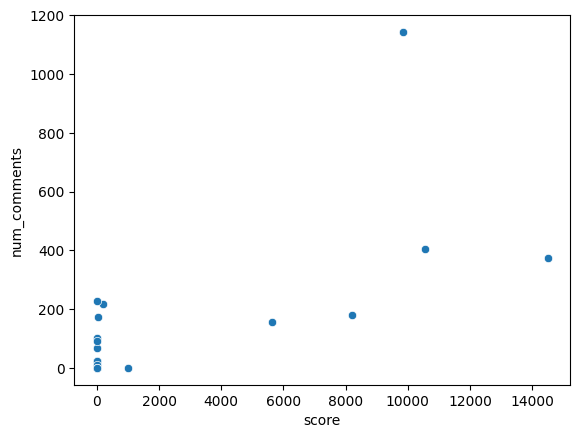

In [14]:
# Summary stats
print(df[['score', 'num_comments']].describe())

# Correlation between score and comments
correlation = df['score'].corr(df['num_comments'])
print(f"Correlation (score vs. comments): {correlation:.2f}")

sns.scatterplot(x='score', y='num_comments', data=df)

flair
Discussion             11
News Article            5
Tech Support            2
Site Update "error"     1
Mod Post                1
Name: count, dtype: int64
flair
Site Update "error"    14506.000000
News Article            6843.400000
Mod Post                1010.000000
Discussion                24.909091
Tech Support               1.500000
Name: score, dtype: float64


<Axes: xlabel='flair'>

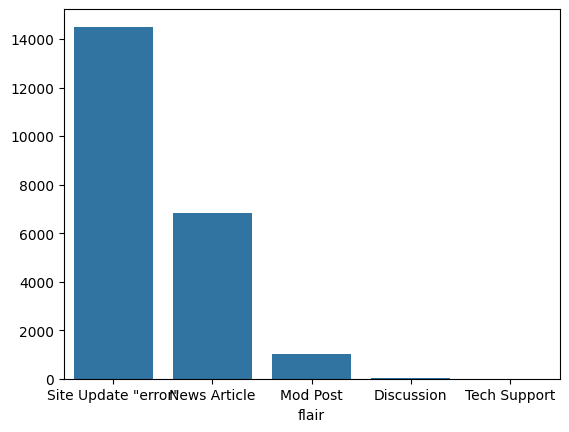

In [15]:
# Frequency of flairs
flair_counts = df['flair'].value_counts()
print(flair_counts)

# Compare average score by flair
flair_score = df.groupby('flair')['score'].mean().sort_values(ascending=False)
print(flair_score)

# Visualize
sns.barplot(x=flair_score.index, y=flair_score.values)

### Conclusion 
##### These things are utterly useless

# Text-Based Analysis

### Sentiment Analysis

In [17]:
text_body = df["combined_text"]
text_body.head()

0    is it true hardly anyone uses facebook anymore...
1    found out how to customize what you see on fac...
2    facebook groups are full of bots  scams and fa...
3    is there any point to hide allfrom the constan...
4    why do things i post on someone elses timeline...
Name: combined_text, dtype: object

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

sentiments = []
for text in text_body:
    sentiment = analyzer.polarity_scores(text)
    sentiments.append(sentiment["compound"])

print(sentiments)
print(sum(sentiments))

[0.4215, 0.9595, -0.8555, 0.3268, 0.25, -0.4381, 0.9594, -0.3438, 0.7248, -0.8311, 0.1395, -0.5574, -0.6491, -0.6124, -0.34, -0.34, -0.7398, -0.8034, -0.5789, 0.0731]
-3.2349


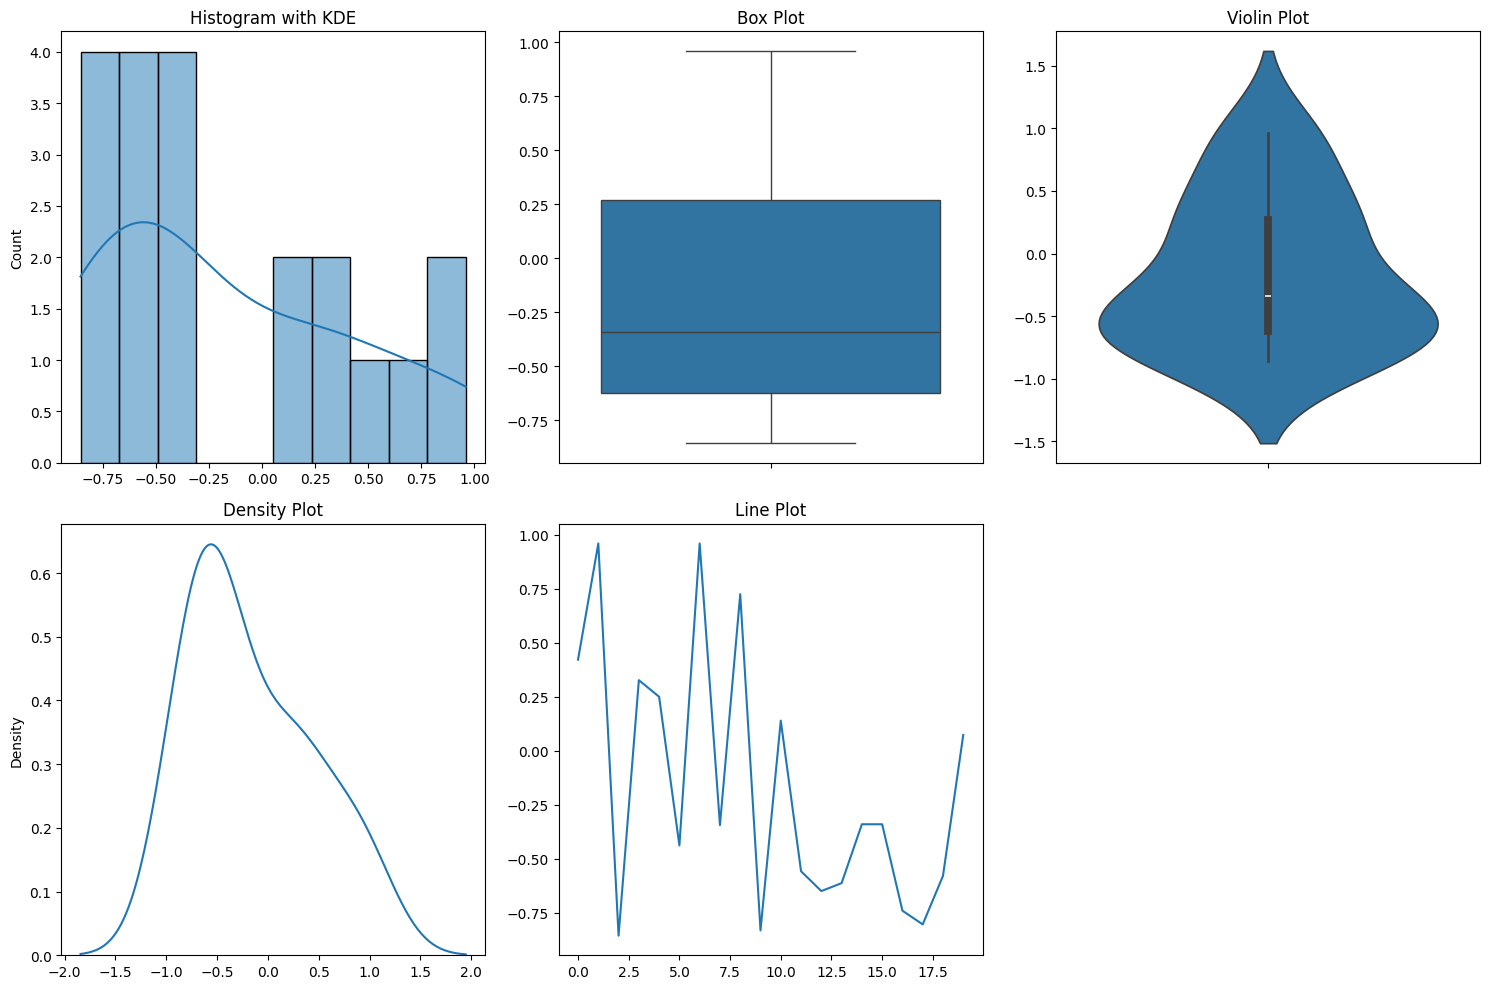

In [19]:
data = sentiments

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Histogram
sns.histplot(data, bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram with KDE')

# Box plot
sns.boxplot(data=data, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot')

# Violin plot
sns.violinplot(data=data, ax=axes[0, 2])
axes[0, 2].set_title('Violin Plot')

# Density Plot
sns.kdeplot(data, ax=axes[1, 0])
axes[1, 0].set_title('Density Plot')

# Line Plot
sns.lineplot(x=range(len(data)), y=data, ax=axes[1, 1])
axes[1, 1].set_title('Line Plot')

# Empty plot (just to complete the 2x3 grid)
axes[1, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


### I see absolutely no good insight here, maybe data science is not for me

In [20]:
df["sentiment"] = sentiments

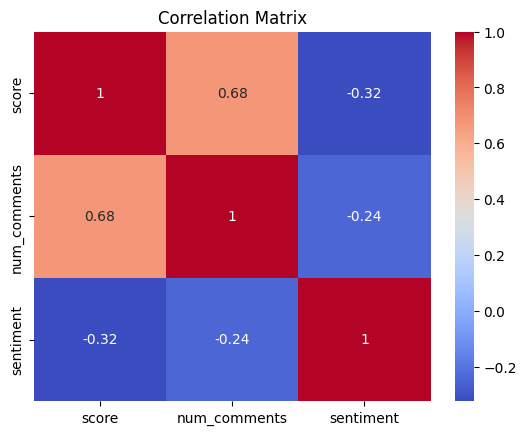

In [21]:
# Correlation matrix
corr_matrix = df[['score', 'num_comments', 'sentiment']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()